In [20]:
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')

In [21]:
#행정구역별 인구수
df = pd.read_excel('행정구역_202401.xlsx', skiprows=1)
df.head()

,행정구역(시군구)별,총인구수 (명),남자인구수 (명),여자인구수 (명)
0,전국,51313912,25558944,25754968
1,서울특별시,9384325,4538354,4845971
2,종로구,139378,67240,72138
3,중구,121322,58651,62671
4,용산구,212175,101793,110382


In [22]:
df1 = df.copy()
df1.columns=['행정구역2','총인구수','남자인구수','여자인구수']
df1['행정구역1'] = ''
df1.head()

,행정구역2,총인구수,남자인구수,여자인구수,행정구역1
0,전국,51313912,25558944,25754968,
1,서울특별시,9384325,4538354,4845971,
2,종로구,139378,67240,72138,
3,중구,121322,58651,62671,
4,용산구,212175,101793,110382,


In [23]:
df2 = df1.copy()
cols = list(df1.columns)
df2 = df1[[cols[-1]]+cols[0:-1]]
df2

,행정구역1,행정구역2,총인구수,남자인구수,여자인구수
0,,전국,51313912,25558944,25754968
1,,서울특별시,9384325,4538354,4845971
2,,종로구,139378,67240,72138
3,,중구,121322,58651,62671
4,,용산구,212175,101793,110382
...,...,...,...,...,...
288,,거창군,59909,29480,30429
289,,합천군,41096,20094,21002
290,,제주특별자치도,674353,337578,336775
291,,제주시,490888,245197,245691


In [24]:
sidos = ['특별시', '광역시', '자치시', '경기도', '남도', '북도', '자치도']
for i in range(1, len(df2)):
    for sido in sidos:
        if sido in df2.loc[i, '행정구역2']:
            df2.loc[i, '행정구역1'] = df2.loc[i, '행정구역2']
            df2.loc[i, '행정구역2'] = '소계'
df2

,행정구역1,행정구역2,총인구수,남자인구수,여자인구수
0,,전국,51313912,25558944,25754968
1,서울특별시,소계,9384325,4538354,4845971
2,,종로구,139378,67240,72138
3,,중구,121322,58651,62671
4,,용산구,212175,101793,110382
...,...,...,...,...,...
288,,거창군,59909,29480,30429
289,,합천군,41096,20094,21002
290,제주특별자치도,소계,674353,337578,336775
291,,제주시,490888,245197,245691


In [25]:
for i in range(2, len(df)):
    if df2.loc[i, '행정구역1'] == '':
        df2.loc[i, '행정구역1'] = df2.loc[i-1, '행정구역1']
df2.loc[0, '행정구역1'] = '전국'
df2.loc[0, '행정구역2'] = '합계'
df2

,행정구역1,행정구역2,총인구수,남자인구수,여자인구수
0,전국,합계,51313912,25558944,25754968
1,서울특별시,소계,9384325,4538354,4845971
2,서울특별시,종로구,139378,67240,72138
3,서울특별시,중구,121322,58651,62671
4,서울특별시,용산구,212175,101793,110382
...,...,...,...,...,...
288,경상남도,거창군,59909,29480,30429
289,경상남도,합천군,41096,20094,21002
290,제주특별자치도,소계,674353,337578,336775
291,제주특별자치도,제주시,490888,245197,245691


In [26]:
filt = df2['행정구역2'] == '소계'
df3 = df2[filt]
df3 = df3.sort_values('행정구역1')
df3

,행정구역1,행정구역2,총인구수,남자인구수,여자인구수
145,강원특별자치도,소계,1526243,767496,758747
88,경기도,소계,13635250,6857867,6777383
263,경상남도,소계,3248703,1636010,1612693
238,경상북도,소계,2551370,1288999,1262371
68,광주광역시,소계,1418241,700377,717864
44,대구광역시,소계,2373844,1166110,1207734
74,대전광역시,소계,1441562,719008,722554
27,부산광역시,소계,3290964,1603859,1687105
1,서울특별시,소계,9384325,4538354,4845971
86,세종특별자치시,소계,386944,192704,194240


In [31]:
import matplotlib.pyplot as plt
plt.rc('font', family = 'Malgun Gothic')
plt.rc('axes', unicode_minus = False)

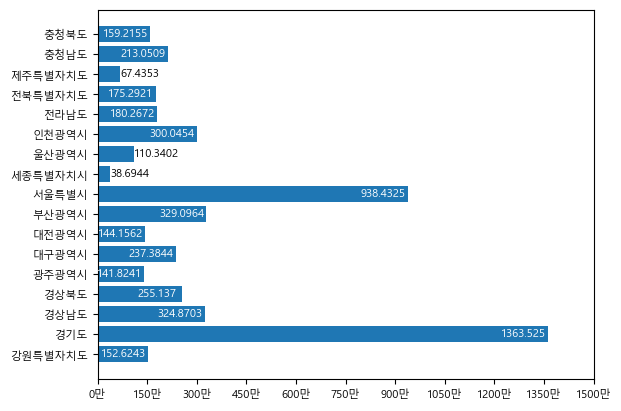

In [55]:
plt.rc('font', size='8')
plt.barh(df3['행정구역1'], df3['총인구수']/10000)

xticks = [i for i in range(0, 1501, 150)]
plt.xticks(xticks, [f'{x}만' for x in xticks])

for idx, p in enumerate(df3['총인구수']/10000):
    if p > 1103402/10000:
        plt.text(p-75, idx-0.1, p, ha='center', color='w')
plt.text(386944/10000, 8.9, 386944/10000)
plt.text(1103402/10000, 9.9, 1103402/10000)
plt.text(674353/10000, 13.9, 674353/10000)

plt.show()